In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [5]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Si el modelo está overfitting, significa que el modelo se comporta demasiado bien solo para el conjunto de datos de entrenamiento, pero no para para sus predicciones. Para esto podemos dividir el modelo de entrenamiento en 2, y usar un set para entrenar y el otro para testear.

(array([ 5., 10., 16., 28., 35., 37., 33., 19., 11.,  6.]),
 array([-2.39067347, -1.9166428 , -1.44261213, -0.96858146, -0.49455078,
        -0.02052011,  0.45351056,  0.92754123,  1.4015719 ,  1.87560257,
         2.34963325]),
 <a list of 10 Patch objects>)

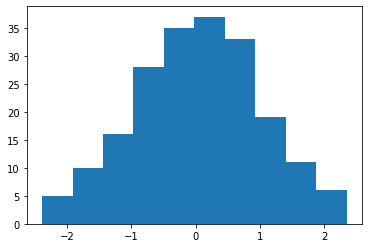

In [6]:
# Creamos una distribución uniforme con el mismo numero de valores que nuestro dataset
a = np.random.randn(len(data))
plt.hist(a)

In [7]:
# Me quedaré con el 80% de los datos para entrenar y el 20% para validar
check = (a<0.8)
training = data[check]
testing = data[~check]

In [8]:
len(training), len(testing)

(161, 39)

In [9]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     615.1
Date:                Tue, 04 Aug 2020   Prob (F-statistic):           2.77e-75
Time:                        09:09:07   Log-Likelihood:                -314.52
No. Observations:                 161   AIC:                             635.0
Df Residuals:                     158   BIC:                             644.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8822      0.345      8.360      0.000       2.201       3.563
TV             0.0457      0.002     28.777      0.000       0.043       0.049
Radio          0.1864      0.009     20.405      0.000       0.168       0.204
==============================================================================
Omnibus:                       51.971   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.383
Skew:                          -1.355   Prob(JB):                     8.03e-29
Kurtosis:                       6.456   Cond. No.                         433.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm.params

Intercept    2.882240
TV           0.045698
Radio        0.186393
dtype: float64

In [12]:
# Sales = lm.params[0] + lm.params[1]*TV + lm.params[2]*Radio

#ahora validamos el modelo co el conjunto de testing

sales_pred = lm.predict(testing)
sales_pred

2      12.223680
7      12.028492
8       3.666672
11     17.167123
15     20.702651
19     14.068409
33     18.747604
34      7.516532
36     23.243159
38      9.828530
41     17.196384
42     21.462384
47     21.580597
51      9.259735
58     21.760554
59     18.009490
61     22.782216
71     10.565346
78      8.702155
85     15.140807
97     15.246131
102    17.569513
103    14.674934
105    17.832680
106     6.075022
111    21.010480
117     6.522716
119     6.751074
120    14.334757
121     7.786093
142    19.146988
160    14.138932
167    13.301922
173    11.901248
174    13.679311
185    20.656735
189     5.992153
191     8.345515
196     8.100359
dtype: float64

In [13]:
len(sales_pred)

39

In [14]:
SSD = sum((testing["Sales"]-sales_pred)**2)

In [15]:
SSD

89.45604583121538

In [16]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.5763534381534507

In [17]:
sales_mean = np.mean(testing["Sales"])

In [18]:
error = RSE/sales_mean
error

0.10869480920789354

In [19]:
# Nos quedamos con un 'error' de los datos sin explicación

Nuestro modelo generaliza medianamente bien respecto al total o si validamos el modelo con un subconjunto del dataset.